# covidtracking data plots

* https://covidtracking.com/
* https://ourworldindata.org/coronavirus-testing

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
sns.set_context('talk')
import panel as pn
import panel.widgets as pnw
pn.extension()

In [2]:
daily = pd.read_csv('https://covidtracking.com/api/v1/states/daily.csv')
daily['date'] = pd.to_datetime(daily.date, format='%Y%m%d')
daily['percPositiveIncrease'] = daily.positiveIncrease/daily.totalTestResultsIncrease
daily=daily[daily.date>='2020-03-15']

In [3]:
cols=['positiveIncrease','negativeIncrease','percPositiveIncrease','deathIncrease','totalTestResultsIncrease']
daily.columns
#daily[daily.state=='NY'].iloc[0]

Index(['date', 'state', 'positive', 'negative', 'pending',
       'hospitalizedCurrently', 'hospitalizedCumulative', 'inIcuCurrently',
       'inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative',
       'recovered', 'dataQualityGrade', 'lastUpdateEt', 'dateModified',
       'checkTimeEt', 'death', 'hospitalized', 'dateChecked',
       'totalTestsViral', 'positiveTestsViral', 'negativeTestsViral',
       'positiveCasesViral', 'deathConfirmed', 'deathProbable',
       'totalTestEncountersViral', 'totalTestsPeopleViral',
       'totalTestsAntibody', 'positiveTestsAntibody', 'negativeTestsAntibody',
       'totalTestsPeopleAntibody', 'positiveTestsPeopleAntibody',
       'negativeTestsPeopleAntibody', 'totalTestsPeopleAntigen',
       'positiveTestsPeopleAntigen', 'totalTestsAntigen',
       'positiveTestsAntigen', 'fips', 'positiveIncrease', 'negativeIncrease',
       'total', 'totalTestResults', 'totalTestResultsIncrease', 'posNeg',
       'deathIncrease', 'hospitalizedIn

In [4]:
totals = daily.groupby('date').agg(['sum'])[cols]#.reset_index()
totals.columns=totals.columns.droplevel(1)
totals['percPositiveIncrease'] = totals.positiveIncrease/totals.totalTestResultsIncrease*100
#totals=totals[45:]

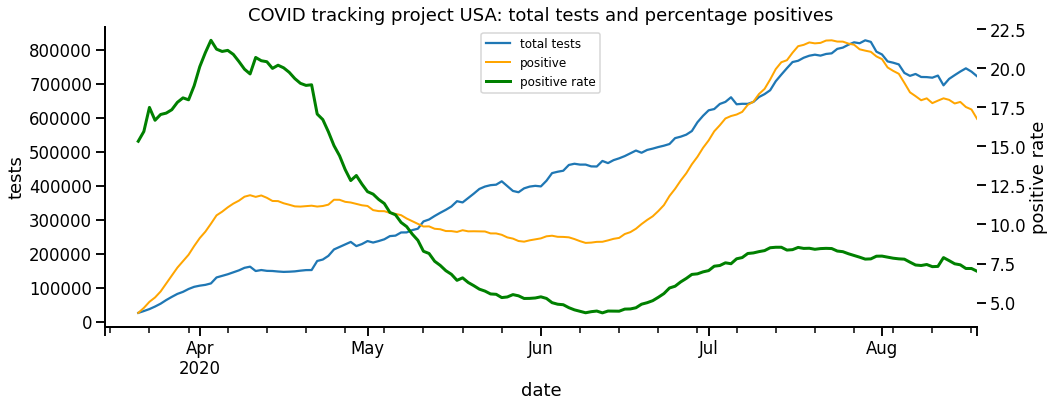

In [9]:
totals
f,ax=plt.subplots(figsize=(15,6))
x=totals.rolling(7).mean()
l1=x.plot(y='totalTestResultsIncrease',ax=ax,legend=False)       
ax1=ax.twinx()
x.plot(y='positiveIncrease',ax=ax1,color='orange',legend=False,lw=2)
ax1.axis('off')
ax2=ax.twinx()
x.plot(y='percPositiveIncrease',ax=ax2,color='green',legend=False,lw=3)
ax.legend([ax.get_lines()[0],ax1.get_lines()[0],ax2.get_lines()[0]],['total tests','positive','positive rate'],loc=9,fontsize=12)
ax.set_ylabel('tests')
ax2.set_ylabel('positive rate')
ax.set_title('COVID tracking project USA: total tests and percentage positives')
sns.despine()
plt.tight_layout()
f.savefig('us_covid_positives_total.png')

In [44]:
summary = daily.groupby('state')\
            .agg({'positive':np.max,'hospitalized':np.max,'negative':np.max,'death':np.max,'totalTestsViral':np.max}).reset_index()
#summary

In [ ]:
m=pd.melt(summary,id_vars='state')
m
sns.catplot(y='variable',x='value',data=m,col='state',col_wrap=7,aspect=1,height=4,kind='bar',sharex=False)

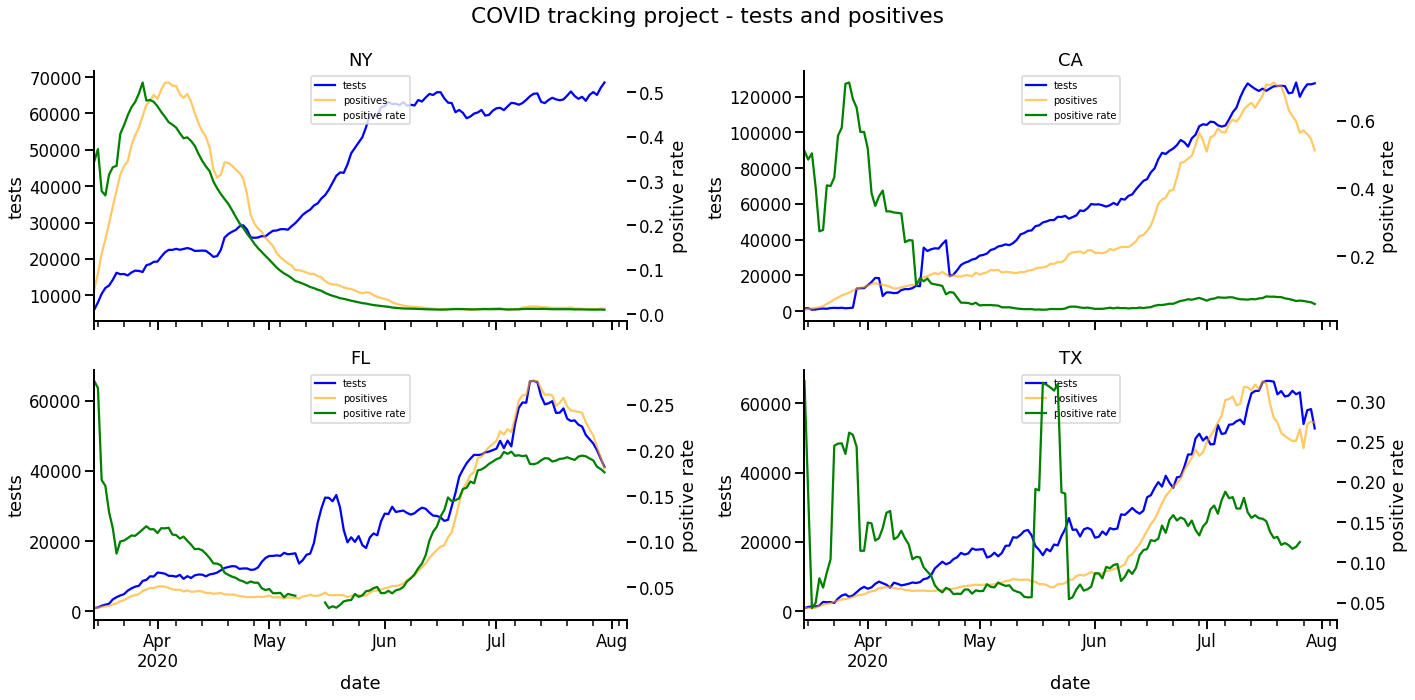

In [153]:
def plot_state(name, ax=None, window=7):
    sub = daily[daily.state==name]    
    x=sub.set_index('date')[cols].rolling(window).mean()
    f=None
    if ax==None:
        f,ax=plt.subplots(figsize=(15,5))    
    l1=x.plot(y='totalTestResultsIncrease',color='red',ax=ax,legend=False)       
    ax1=ax.twinx()
    x.plot(y='positiveIncrease',ax=ax1,color='orange',legend=False,alpha=.6)
    ax1.axis('off')
    ax2=ax.twinx()    
    x.plot(y='percPositiveIncrease',ax=ax2,color='green',legend=False)
    ax.legend([ax.get_lines()[0],ax1.get_lines()[0],ax2.get_lines()[0]],['tests','positives','positive rate'],loc=9,fontsize=10)
    ax.set_ylabel('tests')
    ax2.set_ylabel('positive rate')
    ax.set_title(name)
    return f

def plot_scatter(name,ax=None):
    sub = daily[daily.state==name]
    x=sub.set_index('date')[cols]  
    x.plot(x='totalTestResultsIncrease',y='positiveIncrease',ax=ax,c='black',kind='scatter')
    ax.set_title(name)
    
fig,ax=plt.subplots(2,2,figsize=(20,10))
axs=ax.flat
i=0
for s in ['NY','CA','FL','TX']:
    f=plot_state(s,ax=axs[i])#, col2='deathIncrease')
    #plot_scatter(s,ax=axs[i])
    i+=1
fig.suptitle('COVID tracking project - tests and positives')
sns.despine()
plt.tight_layout()
fig.savefig('us_covid_tests_positives_fourstates.png')

In [94]:
def update_plot(event):
    f = plot_state(country_select.value)
    plot_pane.object = f
    

## dashboard

In [95]:
names = list(daily.state.unique() )
plot_pane = pn.pane.Matplotlib()
country_select = pnw.Select(name="State", value='NY', height=40, options=names, width=180)
country_select.param.watch(update_plot, 'value')
app = pn.Column(country_select,plot_pane,width=300)
                     
app

Column(width=300)
    [0] Select(height=40, name='State', options=['AK', 'AL', 'AR', ...], sizing_mode='fixed', value='NY', width=180)
    [1] Matplotlib(None)